In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [2]:
path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(path)
conn = engine.connect()

In [3]:
inspector = inspect(engine)

tables = inspector.get_table_names()

In [4]:
#inspecting the tables
for table in tables:
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
        
    print()

measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [5]:
#looking at the data from stationDB
query = """
        SELECT 
            *
        FROM
            station
        LIMIT 10"""
pd.read_sql(query, conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [6]:
#looking at data from measurementDB
query = """
        SELECT 
            *
        FROM
            measurement
        LIMIT 10"""
pd.read_sql(query, conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


# Precipitaiton Analysis

In [7]:
#finding max date
query = """
        SELECT
            max(date)
        FROM
            measurement
        """
engine.execute(query).fetchall()

[('2017-08-23',)]

In [8]:
#finding the last 12 months data
query = """
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE
            date >='2016-08-23'
        ORDER BY 
            date;
        """
df = pd.read_sql(query,conn)
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [9]:
#convert to dataframe
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2230 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.0 KB


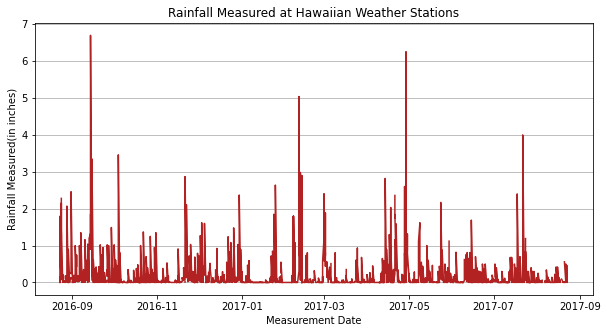

In [35]:
#plot the data
plt.figure(figsize=(10,5))
plt.plot(df["date"], df["prcp"], color="firebrick")
plt.xlabel("Measurement Date")
plt.ylabel("Rainfall Measured(in inches)")
plt.title("Rainfall Measured at Hawaiian Weather Stations")
plt.grid(axis="y")
plt.show()

# Stations Analysis

In [11]:
#number of stations
query = """
        SELECT 
            count(station)
        FROM
            station;
        """
engine.execute(query).fetchall()

[(9,)]

In [12]:
#finding the station with the most observations
query = """
        SELECT 
            s.station,
            s.name,
            count(m.id) as observations
        FROM
            measurement m
            JOIN station s on m.station = s.station
        GROUP BY
            s.station,
            s.name
        ORDER BY
            observations desc;
        """
pd.read_sql(query, conn)

,station,name,observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [13]:
#Temp analysis for the station with the most recordings
query = """
        SELECT 
            station,
            min(tobs) as min_temp,
            max(tobs) as max_temp,
            avg(tobs) as avg_temp
        FROM 
            measurement
        WHERE 
            station = 'USC00519281'
            """
pd.read_sql(query,conn)

,station,min_temp,max_temp,avg_temp
0,USC00519281,54.0,85.0,71.663781


In [14]:
query = """
        SELECT
            station,
            count(id) as total_observations
        FROM
            measurement
        GROUP BY
            station
        ORDER BY
            total_observations desc;
        """
pd.read_sql(query, conn)

,station,total_observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [15]:
#converting station data to dataframe to plot 
query = """
        SELECT
            station,
            date,
            tobs
        FROM
            measurement
        WHERE
            date >='2016-08-23'
            AND station = 'USC00519281'
        ORDER BY 
            date asc;
        """
df2 = pd.read_sql(query, conn)
df2["date"] = pd.to_datetime(df2["date"])
df2.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


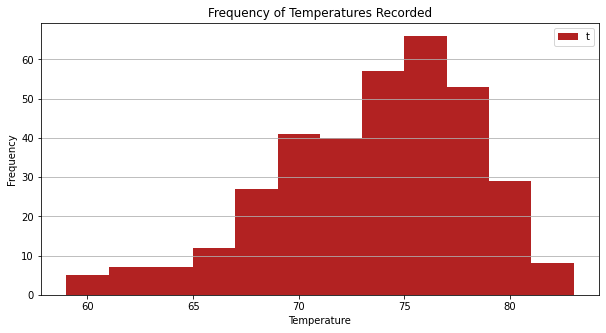

In [31]:
#ploting the dataframe as a histogram 
plt.figure(figsize = (10, 5))
plt.hist(df2.tobs, bins=12, color="firebrick")
plt.grid(axis = "y")
plt.title("Frequency of Temperatures Recorded")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")
plt.show()